House Price Prediciton

## Problem statement: 

### A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price. 


## Objective:

### Take advantage of all of the feature variables available below, use it to analyse and predict house prices. 

1.	cid: a notation for a house

2.	dayhours: Date house was sold

3.	price: Price is prediction target

4.	room_bed: Number of Bedrooms/House

5.	room_bath: Number of bathrooms/bedrooms

6.	living_measure: square footage of the home

7.	lot_measure: quare footage of the lot

8.	ceil: Total floors (levels) in house

9.	coast: House which has a view to a waterfront

10.	sight: Has been viewed

11.	condition: How good the condition is (Overall)

12.	quality: grade given to the housing unit, based on grading system

13.	ceil_measure: square footage of house apart from basement

14.	basement_measure: square footage of the basement

15.	yr_built: Built Year

16.	yr_renovated: Year when house was renovated

17.	zipcode: zip

18.	lat: Latitude coordinate

19.	long: Longitude coordinate

20.	living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21.	lot_measure15: lotSize area in 2015(implies-- some renovations)

22.	furnished: Based on the quality of room 

23. total_area: Measure of both living and lot

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
city= pd.read_csv("../input/innercity/innercity.csv")

In [3]:
city.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
city.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440
21612,6413600276,20150324T000000,354950,3,1.00,970,5922,1.5,0,0,...,0,1949,0,98125,47.7190,-122.321,1730,6128,0,6892


In [5]:
def details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Type'] = df.dtypes
    b['No. of Unique Values'] = df.nunique()
    return b

In [6]:
details(city)

,Null Values,Data Type,No. of Unique Values
cid,0,int64,21436
dayhours,0,object,372
price,0,int64,3625
room_bed,0,int64,13
room_bath,0,float64,30
living_measure,0,int64,1038
lot_measure,0,int64,9782
ceil,0,float64,6
coast,0,int64,2
sight,0,int64,5


In [7]:
city.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [8]:
city.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [10]:
city.corr()['price']

cid                -0.016797
price               1.000000
room_bed            0.308338
room_bath           0.525134
living_measure      0.702044
lot_measure         0.089655
ceil                0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil_measure        0.605566
basement            0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
Name: price, dtype: float64

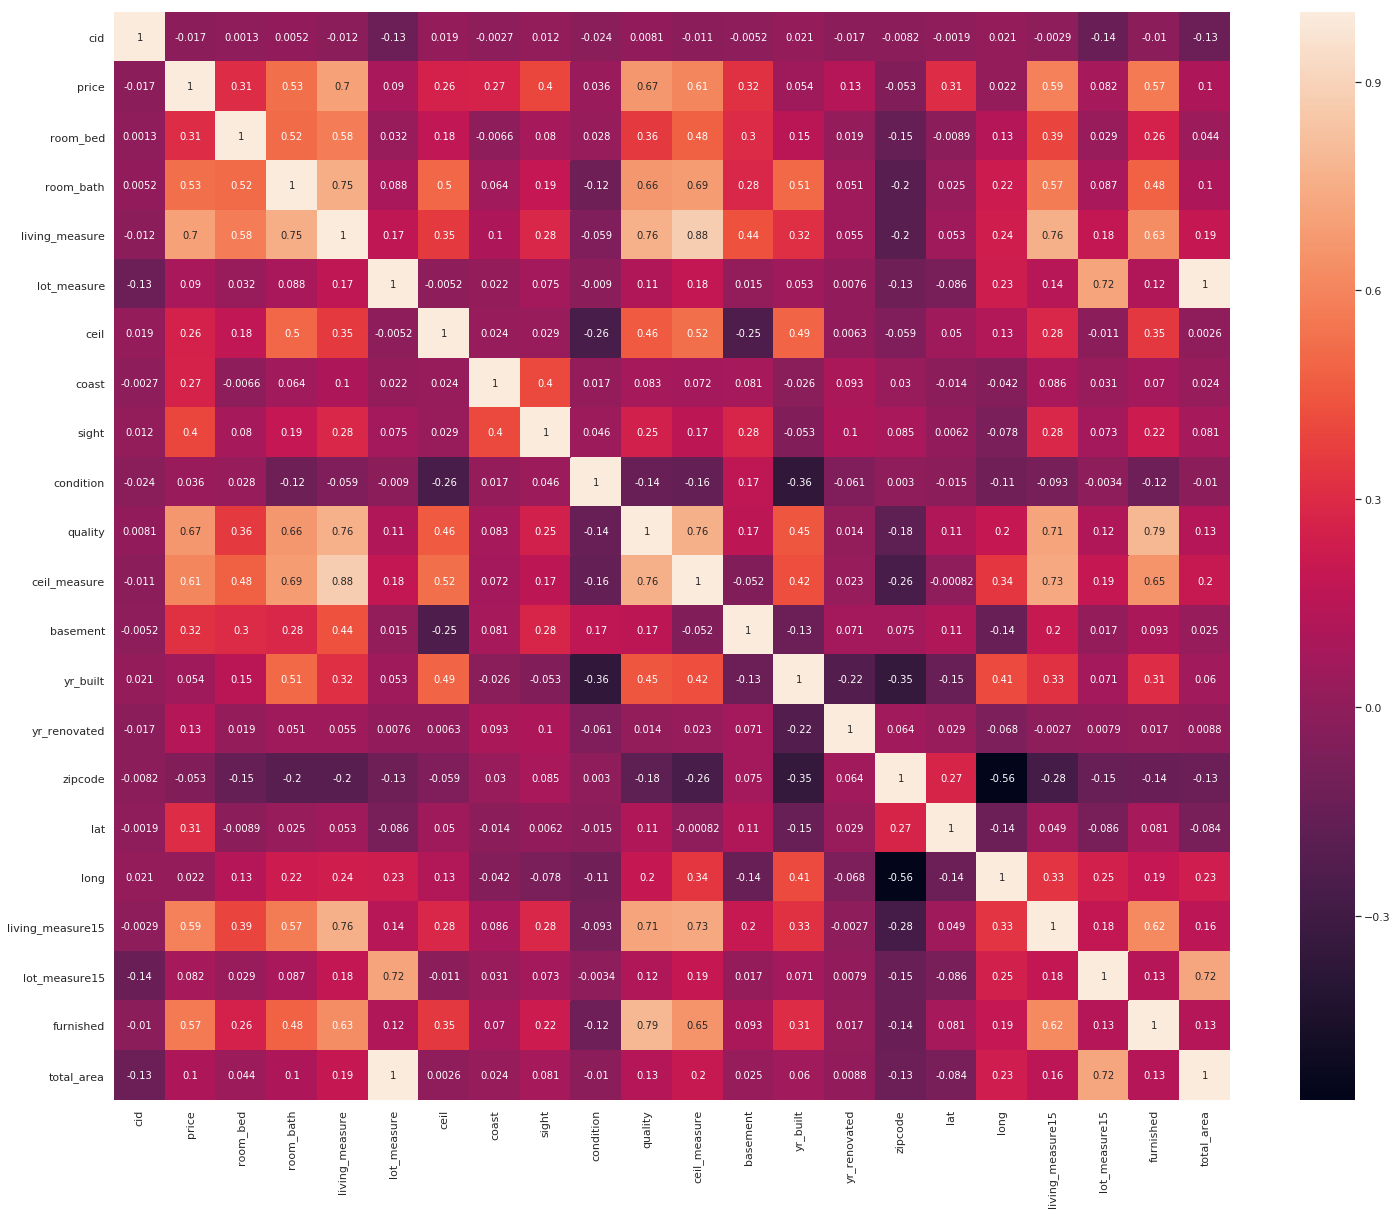

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(city.corr(),annot=True)
plt.show()

In [12]:
city['dayhours']= [x.strip().replace('T000000','') for x in city.dayhours]

In [13]:
city['dayhours'] = pd.to_datetime(city.dayhours)

In [14]:
city['year_sold'] = city.dayhours.dt.year

In [15]:
city_1 = city.drop(columns = 'dayhours')

In [16]:
city_1[city_1['room_bed'] == 33].index

Int64Index([750], dtype='int64')

In [17]:
city_1['room_bed']=city_1['room_bed'].astype('category')

In [18]:
city_1.drop(columns = 'cid',inplace=True)

In [19]:
city_1.drop(index=750,inplace=True)

In [20]:
city_1 = city_1.reset_index()
city_1.drop(columns='index',inplace=True)

In [21]:
city_1['room_bath']=city_1['room_bath'].astype('category')
city_1['ceil']=city_1['ceil'].astype('category')
city_1['coast']=city_1['coast'].astype('category')
city_1['sight']=city_1['sight'].astype('category')
city_1['condition']=city_1['condition'].astype('category')
city_1['quality']=city_1['quality'].astype('category')

In [22]:
city_1['have_basement'] = city_1['basement'].apply(lambda x: 0 if x==0 else 1)

In [23]:
city_1['Is_renovated'] = city_1['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [24]:
city_1['Age_of_house'] = city_1['year_sold'] - city_1['yr_built']

In [25]:
lst = []
for i in city_1.lat:
    if i<47.255900:
        lst.append('ES')
    elif i>47.255900 and i<47.405900:
        lst.append('MS')
    elif i>47.405900 and i<47.555900:
        lst.append('MN')
    else:
        lst.append('EN')
city_1['SN_region'] = lst
city_1['SN_region'] = city_1['SN_region'].astype('category')

In [26]:
lst = []
for i in abs(city_1.long):
    if i<122.105000:
        lst.append('EE')
    elif i>122.105000 and i<122.205000:
        lst.append('ME')
    elif i>122.205000 and i<122.328000:
        lst.append('MW')
    else:
        lst.append('EW')
city_1['EW_region'] = lst
city_1['EW_region'] = city_1['EW_region'].astype('category')

In [27]:
delete_index = city_1[city_1['Age_of_house']== -1]['year_sold'].index
city_1.drop(index=delete_index,inplace = True)

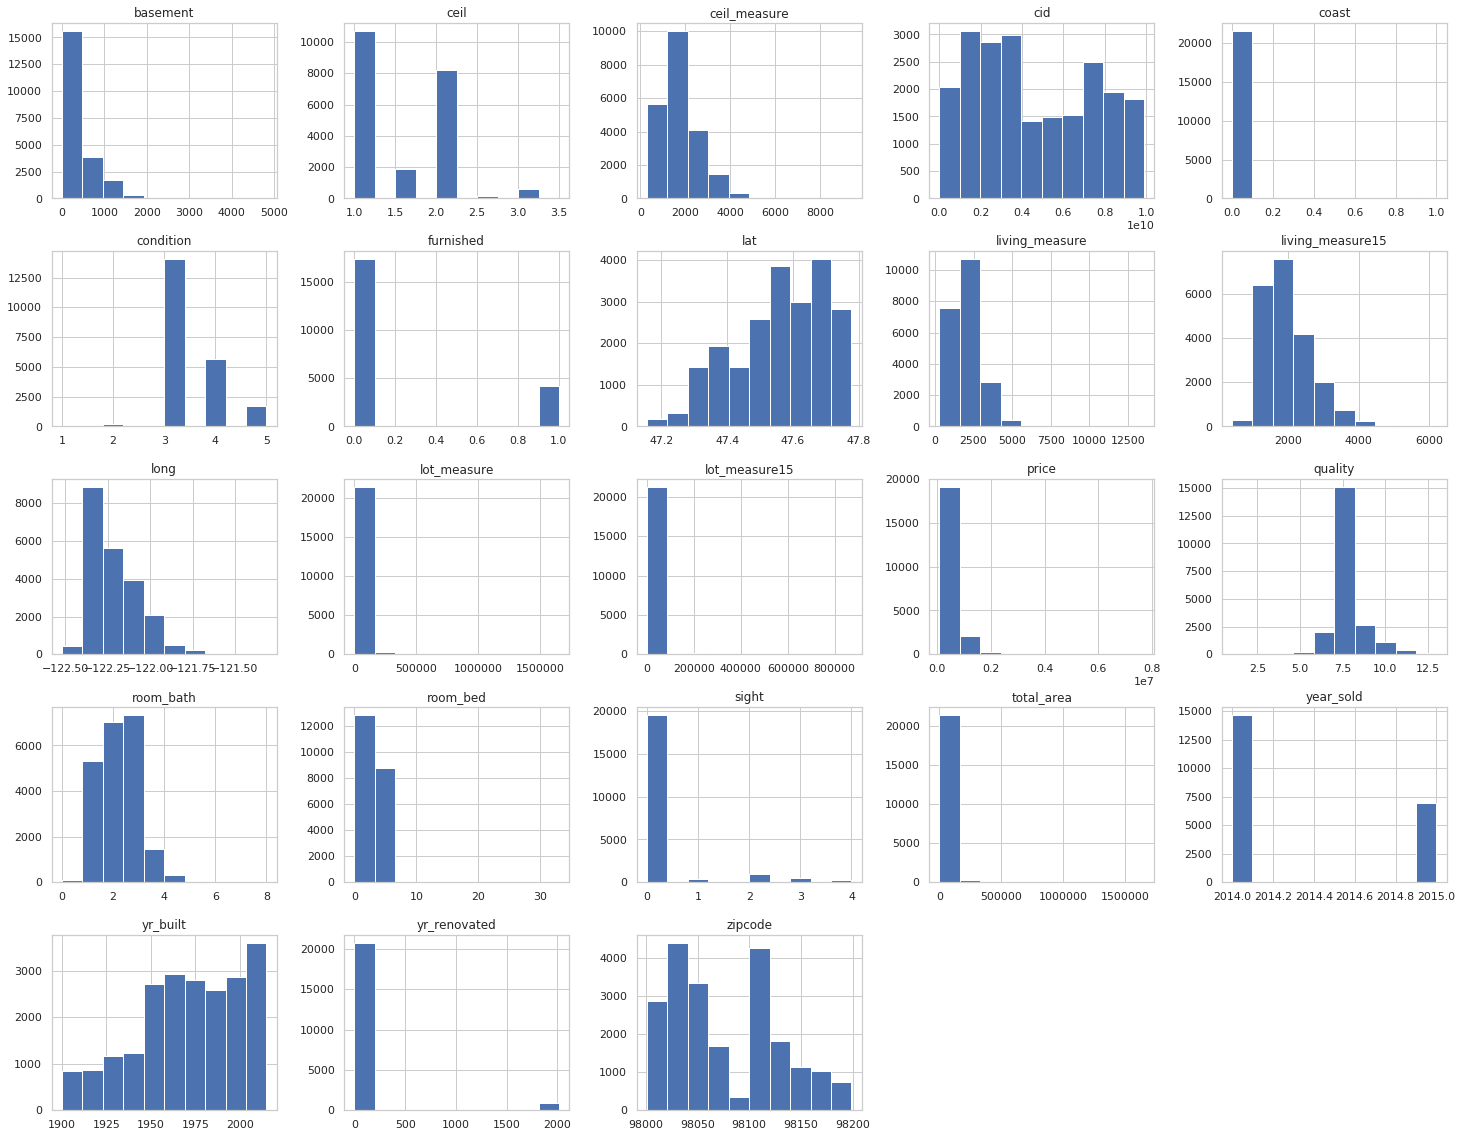

In [28]:
city.hist(figsize=(25,20))
plt.show()

In [29]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode']
city_def = city.drop(columns=list1)
def trend():
    for i in city_def.columns:
        city[[i,'price']].groupby([i]).sum().plot(figsize=(15,5))
        plt.show()

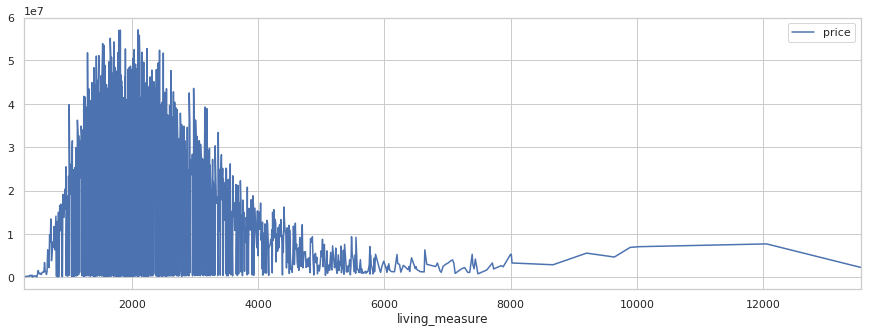

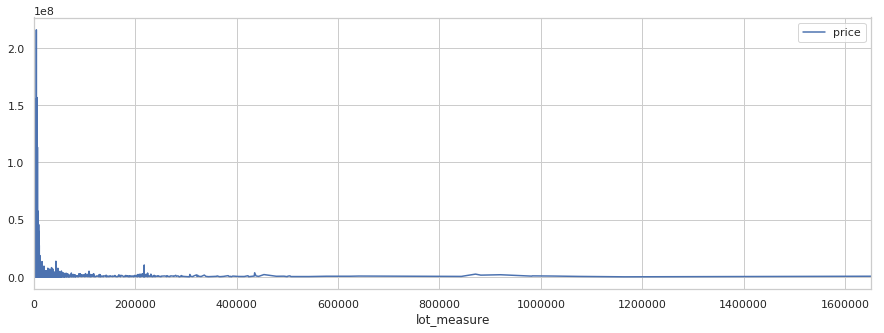

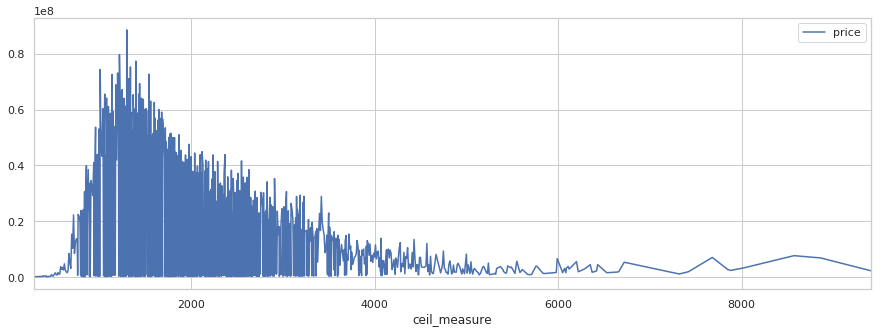

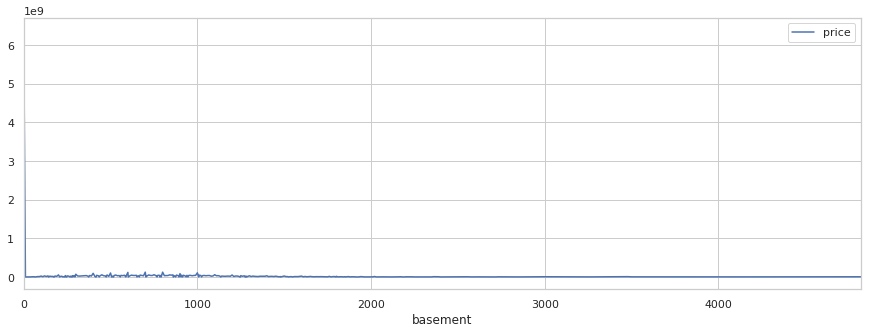

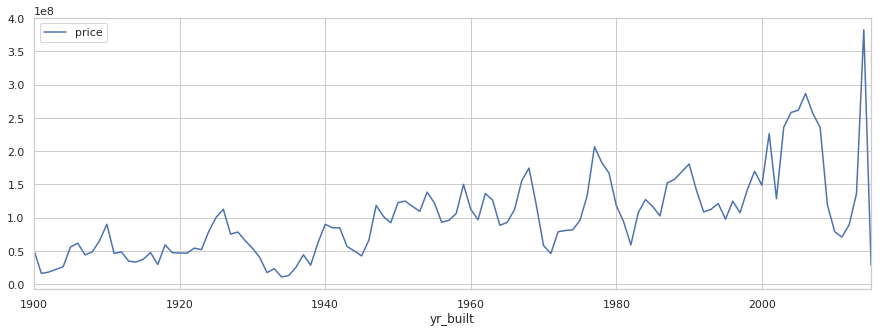

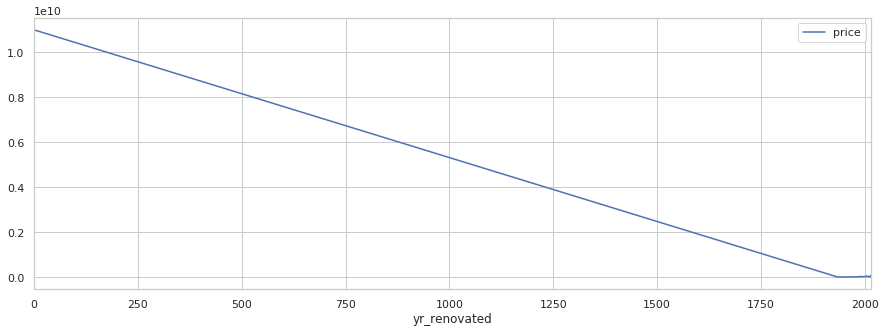

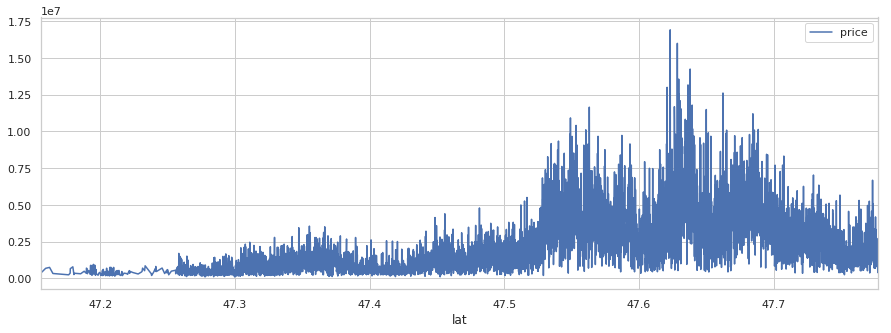

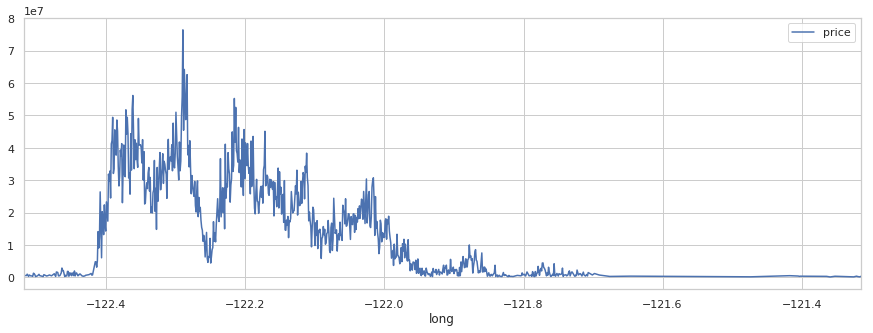

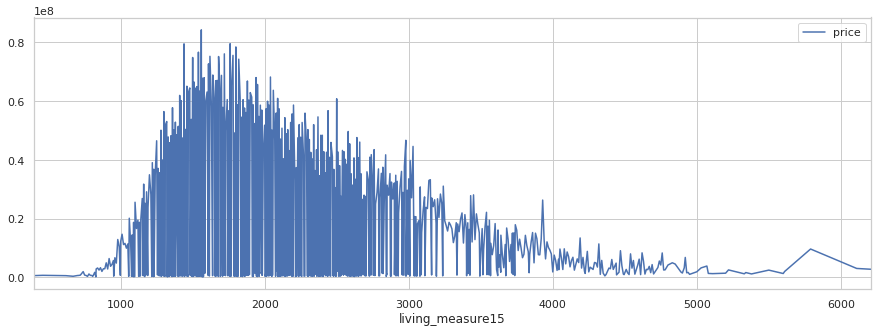

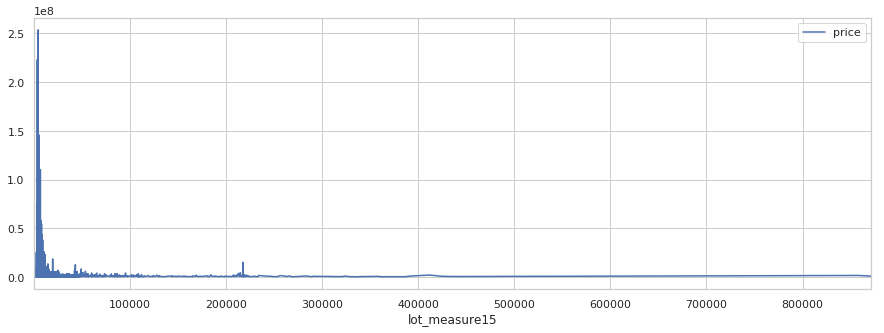

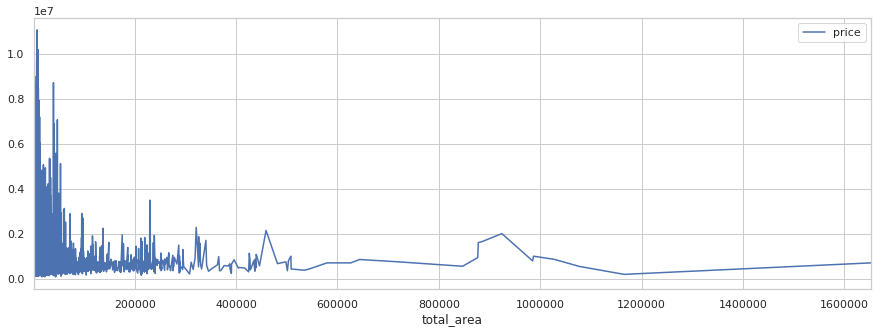

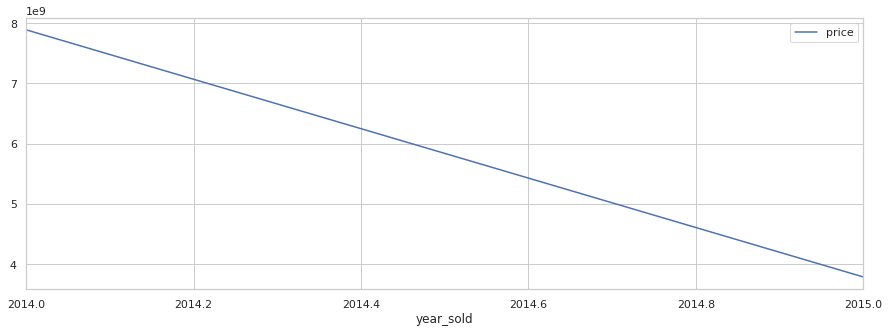

In [30]:
trend() 

In [31]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode','year_sold','yr_renovated','lat','long']
city_def = city.drop(columns=list1)
def scatterr():
    for i in city_def.columns:
        plt.figure(figsize=(15,5))
        sns.regplot(x='price',y=i, data=city, color='#79d13e')
        plt.show()

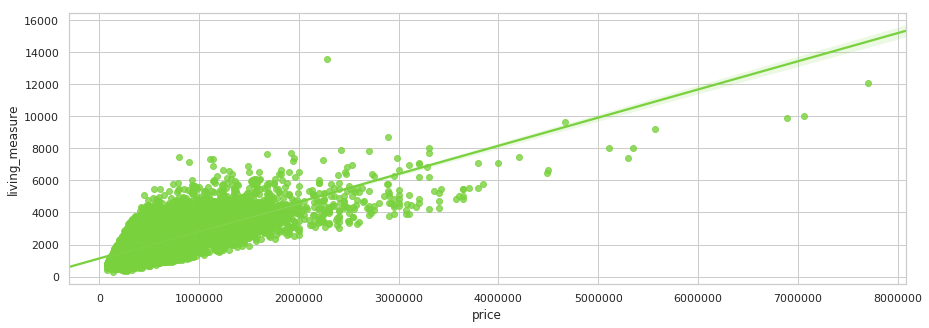

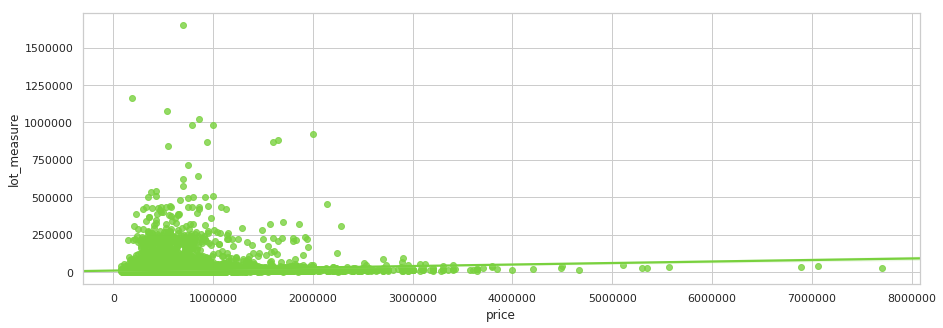

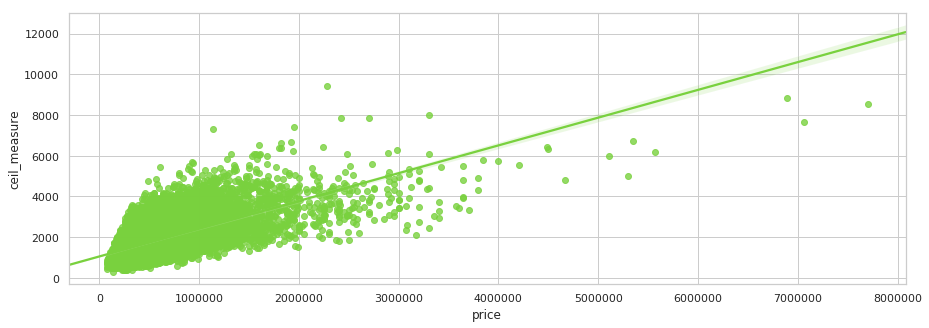

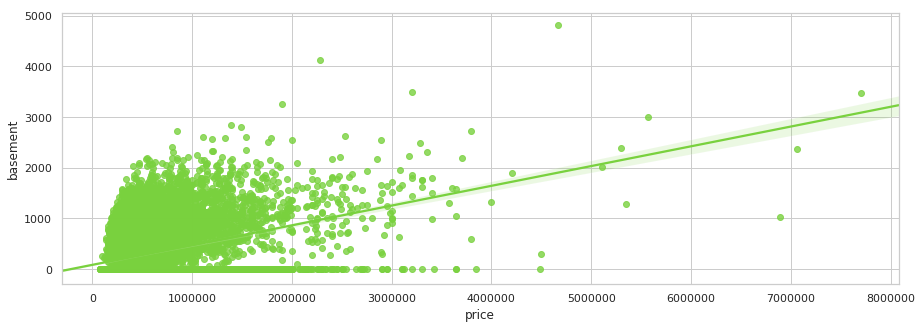

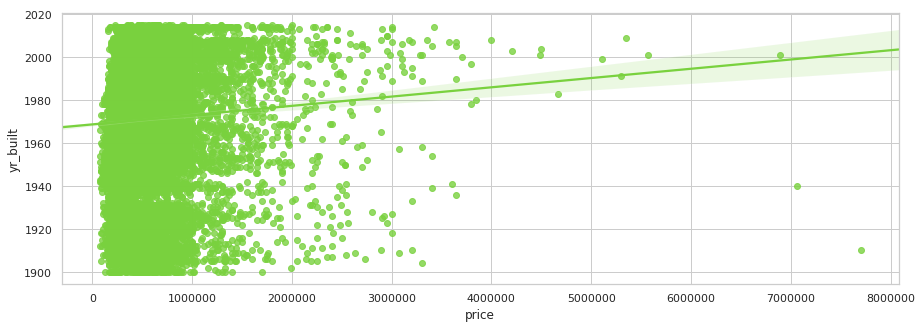

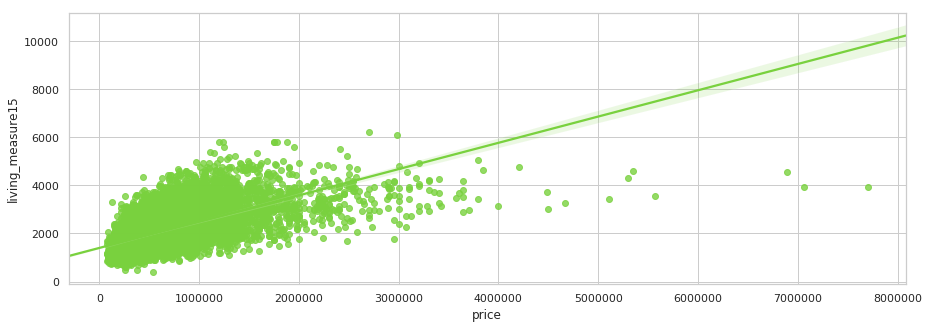

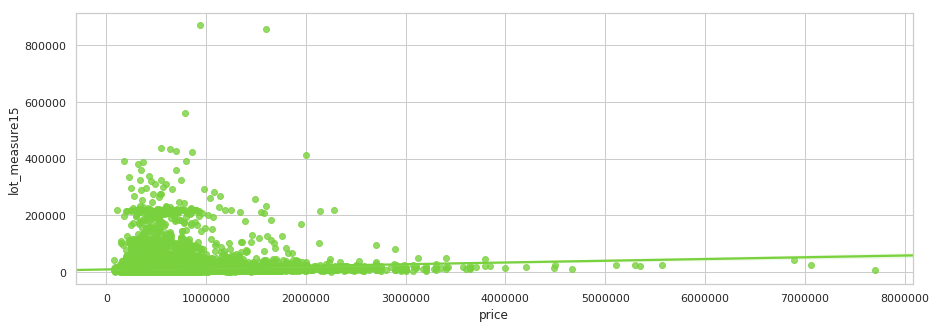

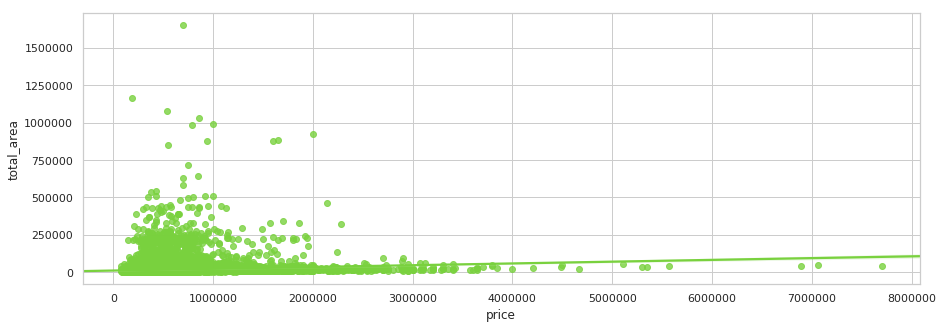

In [32]:
scatterr()

In [33]:
city_1.shape

(21600, 27)

In [34]:
city_1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'year_sold', 'have_basement', 'Is_renovated', 'Age_of_house',
       'SN_region', 'EW_region'],
      dtype='object')

In [35]:
details(city_1)

,Null Values,Data Type,No. of Unique Values
price,0,int64,3622
room_bed,0,category,12
room_bath,0,category,30
living_measure,0,int64,1038
lot_measure,0,int64,9779
ceil,0,category,6
coast,0,category,2
sight,0,category,5
condition,0,category,5
quality,0,category,12


drop columns : 

basement : as the data is already in ceil measure and living measure

yr_built : data is in age of house

yr_renovated : is renovated new column

total_area : ambiguous column

lat, long : made catogorical columns

year_sold : data in age of house

In [36]:
data = city_1.copy()

In [37]:
dummy_data = pd.get_dummies(data)

In [38]:
dummy_data.shape

(21600, 99)

In [39]:
for i in dummy_data.columns:
    print(i)

price
living_measure
lot_measure
ceil_measure
basement
yr_built
yr_renovated
zipcode
lat
long
living_measure15
lot_measure15
furnished
total_area
year_sold
have_basement
Is_renovated
Age_of_house
room_bed_0
room_bed_1
room_bed_2
room_bed_3
room_bed_4
room_bed_5
room_bed_6
room_bed_7
room_bed_8
room_bed_9
room_bed_10
room_bed_11
room_bed_33
room_bath_0.0
room_bath_0.5
room_bath_0.75
room_bath_1.0
room_bath_1.25
room_bath_1.5
room_bath_1.75
room_bath_2.0
room_bath_2.25
room_bath_2.5
room_bath_2.75
room_bath_3.0
room_bath_3.25
room_bath_3.5
room_bath_3.75
room_bath_4.0
room_bath_4.25
room_bath_4.5
room_bath_4.75
room_bath_5.0
room_bath_5.25
room_bath_5.5
room_bath_5.75
room_bath_6.0
room_bath_6.25
room_bath_6.5
room_bath_6.75
room_bath_7.5
room_bath_7.75
room_bath_8.0
ceil_1.0
ceil_1.5
ceil_2.0
ceil_2.5
ceil_3.0
ceil_3.5
coast_0
coast_1
sight_0
sight_1
sight_2
sight_3
sight_4
condition_1
condition_2
condition_3
condition_4
condition_5
quality_1
quality_3
quality_4
quality_5
quality_6
qual

In [40]:
drop_list = ['lat','long','zipcode','yr_built','year_sold','yr_renovated','basement','total_area',
'room_bed_33']

In [41]:
dummy_data.drop(columns=drop_list,inplace =True)

In [42]:
dummy_data.shape

(21600, 90)

In [43]:
dummy_data.corr()['price']

price               1.000000
living_measure      0.702307
lot_measure         0.089631
ceil_measure        0.605737
living_measure15    0.585404
                      ...   
SN_region_MS       -0.281826
EW_region_EE        0.011036
EW_region_EW       -0.036555
EW_region_ME       -0.007324
EW_region_MW        0.031395
Name: price, Length: 90, dtype: float64

In [44]:
details(dummy_data)

,Null Values,Data Type,No. of Unique Values
price,0,int64,3622
living_measure,0,int64,1038
lot_measure,0,int64,9779
ceil_measure,0,int64,946
living_measure15,0,int64,777
...,...,...,...
SN_region_MS,0,uint8,2
EW_region_EE,0,uint8,2
EW_region_EW,0,uint8,2
EW_region_ME,0,uint8,2


In [45]:
x = dummy_data.drop(columns='price')
y = dummy_data.price

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 

In [47]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     599.8
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:26:22   Log-Likelihood:            -2.0473e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15041   BIC:                         4.102e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.624e+05   1.82e+04     14.448      0.000    2.27e+05    2.98e+05
living_measure     110.9634      7.013     15.822      0.000      97.217     124.710
lot_measure          0.2014      0.053      3.777      0.000       0.097       0.306
ceil_measure        24.2996      7.785      3.122      0.002       9.041      39.558
living_measure15    40.6798      3.888     10.463      0.000      33.059      48.300
lot_measure15       -0.5190      0.080     -6.488      0.000      -0.676      -0.362
furnished         5.268e+05   3.31e+04     15.912      0.000    4.62e+05    5.92e+05
have_basement     6413.4241   5948.338      1.078      0.281   -5246.043    1.81e+04
Is_renovated      8.152e+04   8074.535     10.096      0.000    6.57e+04    9.73e+04
Age_of_house      1169.4996     90.860     12.871      0.000     991.403    1347.596
room_bed_0        1.258e+05   7.31e+04      1.722      0.085   -1.74e+04    2.69e+05
room_bed_1        6.644e+04   2.36e+04      2.817      0.005    2.02e+04    1.13e+05
room_bed_2         7.74e+04   1.88e+04      4.116      0.000    4.05e+04    1.14e+05
room_bed_3        6.891e+04   1.84e+04      3.748      0.000    3.29e+04    1.05e+05
room_bed_4        4.481e+04   1.84e+04      2.439      0.015    8797.848    8.08e+04
room_bed_5        3.809e+04   1.88e+04      2.025      0.043    1217.639     7.5e+04
room_bed_6        7383.6090   2.19e+04      0.338      0.736   -3.55e+04    5.02e+04
room_bed_7       -1.039e+04   3.64e+04     -0.285      0.776   -8.18e+04     6.1e+04
room_bed_8        1.111e+05   5.97e+04      1.861      0.063   -5919.709    2.28e+05
room_bed_9        -1.42e+05   9.91e+04     -1.433      0.152   -3.36e+05    5.23e+04
room_bed_10      -1.251e+05   1.23e+05     -1.020      0.308   -3.65e+05    1.15e+05
room_bed_11       1.824e-09   4.15e-10      4.396      0.000    1.01e-09    2.64e-09
room_bath_0.0    -2.907e+05   1.03e+05     -2.815      0.005   -4.93e+05   -8.83e+04
room_bath_0.5    -4.355e+05   1.28e+05     -3.405      0.001   -6.86e+05   -1.85e+05
room_bath_0.75   -3.344e+05   3.45e+04     -9.695      0.000   -4.02e+05   -2.67e+05
room_bath_1.0    -2.968e+05   2.09e+04    -14.211      0.000   -3.38e+05   -2.56e+05
room_bath_1.25   -3.475e+05   7.55e+04     -4.603      0.000   -4.95e+05      -2e+05
room_bath_1.5    -2.996e+05   2.09e+04    -14.366      0.000    -3.4e+05   -2.59e+05
room_bath_1.75   -2.953e+05   2.03e+04    -14.539      0.000   -3.35e+05   -2.55e+05
room_bath_2.0    -2.912e+05   2.05e+04    -14.231      0.000   -3.31e+05   -2.51e+05
room_bath_2.25   -2.758e+05   2.02e+04    -13.669      0.000   -3.15e+05   -2.36e+05
room_bath_2.5    -2.849e+05   1.97e+04    -14.459      0.000   -3.24e+05   -2.46e+05
room_bath_2.75   -2.891e+05   2.03e+04    -14.266      0.000   -3.29e+05   -2.49e+05
room_bath_3.0    -2.645

As the smallest eigenvalue is 4.7e-20, and most of the features are categorical, therefore ignoring the multicollinearity warning of the OLS model. 

After Stepwise Selection of features having p value < 0.05

In [48]:
x = dummy_data[['SN_region_MS', 'living_measure', 'sight_4', 'SN_region_EN', 'furnished', 'quality_9', 'quality_10', 'Age_of_house', 'coast_1', 'quality_13', 'sight_0', 'quality_12', 'quality_8', 'room_bath_7.75', 'EW_region_EE', 'condition_5', 'Is_renovated', 'condition_4', 'room_bath_6.0', 'EW_region_MW', 'living_measure15', 'EW_region_EW', 'room_bath_4.75', 'room_bath_8.0', 'ceil_2.5', 'quality_7', 'room_bath_4.25', 'room_bath_3.25', 'room_bath_5.5', 'room_bath_3.75', 'room_bath_5.25', 'room_bath_5.0', 'room_bath_4.5', 'room_bath_4.0', 'quality_11', 'sight_2', 'lot_measure15', 'room_bath_3.5', 'room_bed_4', 'room_bed_6', 'ceil_1.0', 'room_bed_7', 'room_bath_5.75', 'room_bed_5', 'SN_region_ES', 'room_bath_3.0', 'lot_measure', 'room_bath_6.25', 'room_bath_2.25', 'ceil_measure', 'room_bath_6.75']]
x = x.drop(columns='ceil_1.0')
y = dummy_data.price

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 

In [50]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     953.6
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:26:22   Log-Likelihood:            -2.0474e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15070   BIC:                         4.100e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.387e+04    1.3e+04      1.837      0.066   -1598.299    4.93e+04
SN_region_MS     -9.636e+04   4756.486    -20.259      0.000   -1.06e+05    -8.7e+04
living_measure     115.5115      4.471     25.838      0.000     106.748     124.275
sight_4           9.652e+04    1.7e+04      5.665      0.000    6.31e+04     1.3e+05
SN_region_EN       1.52e+05   3662.701     41.493      0.000    1.45e+05    1.59e+05
furnished         6.135e+05   1.66e+04     36.917      0.000    5.81e+05    6.46e+05
quality_9        -3.981e+05   1.46e+04    -27.326      0.000   -4.27e+05    -3.7e+05
quality_10        -2.58e+05   1.47e+04    -17.494      0.000   -2.87e+05   -2.29e+05
Age_of_house      1079.3731     76.261     14.154      0.000     929.892    1228.855
coast_1           5.716e+05   2.16e+04     26.422      0.000    5.29e+05    6.14e+05
quality_13        9.948e+05   6.23e+04     15.980      0.000    8.73e+05    1.12e+06
sight_0          -1.152e+05   8154.589    -14.128      0.000   -1.31e+05   -9.92e+04
quality_12        3.343e+05   2.43e+04     13.776      0.000    2.87e+05    3.82e+05
quality_8         1.052e+05   6858.764     15.339      0.000    9.18e+04    1.19e+05
room_bath_7.75    3.516e+06   2.01e+05     17.532      0.000    3.12e+06    3.91e+06
EW_region_EE     -1.841e+04   4749.671     -3.876      0.000   -2.77e+04   -9099.912
condition_5       9.148e+04   6129.432     14.925      0.000    7.95e+04    1.03e+05
Is_renovated      8.443e+04   7933.322     10.642      0.000    6.89e+04       1e+05
condition_4       3.975e+04   3788.491     10.493      0.000    3.23e+04    4.72e+04
room_bath_6.0     1.032e+06   9.48e+04     10.888      0.000    8.46e+05    1.22e+06
EW_region_MW      4.573e+04   4473.251     10.222      0.000     3.7e+04    5.45e+04
living_measure15    40.8321      3.836     10.644      0.000      33.313      48.351
EW_region_EW      3.194e+04   4823.294      6.623      0.000    2.25e+04    4.14e+04
room_bath_4.75    4.693e+05    4.9e+04      9.567      0.000    3.73e+05    5.65e+05
room_bath_8.0     1.548e+06   1.41e+05     11.008      0.000    1.27e+06    1.82e+06
ceil_2.5           1.05e+05   1.76e+04      5.956      0.000    7.05e+04     1.4e+05
quality_7         4.356e+04   5633.859      7.732      0.000    3.25e+04    5.46e+04
room_bath_4.25    2.328e+05    2.6e+04      8.956      0.000    1.82e+05    2.84e+05
room_bath_3.25    9.983e+04   9810.039     10.176      0.000    8.06e+04    1.19e+05
room_bath_5.5     5.061e+05   7.21e+04      7.023      0.000    3.65e+05    6.47e+05
room_bath_3.75    1.044e+05   1.83e+04      5.708      0.000    6.86e+04     1.4e+05
room_bath_5.25    3.707e+05   5.67e+04      6.541      0.000     2.6e+05    4.82e+05
room_bath_5.0     3.873e+05   4.47e+04      8.667      0.000       3e+05    4.75e+05
room_bath_4.5     1.799

In [51]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(x_test)

                   0             0
0       SN_region_MS -9.636368e+04
1     living_measure  1.155115e+02
2            sight_4  9.652105e+04
3       SN_region_EN  1.519757e+05
4          furnished  6.134931e+05
5          quality_9 -3.980953e+05
6         quality_10 -2.579931e+05
7       Age_of_house  1.079373e+03
8            coast_1  5.715630e+05
9         quality_13  9.948065e+05
10           sight_0 -1.152060e+05
11        quality_12  3.342609e+05
12         quality_8  1.052076e+05
13    room_bath_7.75  3.515824e+06
14      EW_region_EE -1.840984e+04
15       condition_5  9.147933e+04
16      Is_renovated  8.442562e+04
17       condition_4  3.975243e+04
18     room_bath_6.0  1.031870e+06
19      EW_region_MW  4.572706e+04
20  living_measure15  4.083206e+01
21      EW_region_EW  3.194274e+04
22    room_bath_4.75  4.692690e+05
23     room_bath_8.0  1.547707e+06
24          ceil_2.5  1.050233e+05
25         quality_7  4.356267e+04
26    room_bath_4.25  2.328251e+05
27    room_bath_3.25

In [52]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.759163480079991
Adjusted R squared 0.7572904320171507
 Root Mean Squared Error: 174432.2849


In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

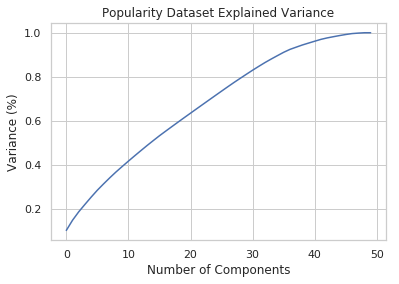

In [54]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA()
model_pca = pca.fit(x_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Popularity Dataset Explained Variance')
plt.show()

In [55]:
model_pca = PCA(n_components=46,svd_solver='full')

In [56]:
new_train = model_pca.fit_transform(x_train_scaled)
new_test  = model_pca.transform(x_test_scaled)

In [57]:
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

# Dump components relations with features:
pd.DataFrame(model_pca.components_,columns=x_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                                                   'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20',
                                                                   'PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30',
                                                                   'PC-31','PC-32','PC-33','PC-34','PC-35','PC-36','PC-37','PC-38','PC-39','PC-40',
                                                                   'PC-41','PC-42','PC-43','PC-44','PC-45','PC-46'])

,SN_region_MS,living_measure,sight_4,SN_region_EN,furnished,quality_9,quality_10,Age_of_house,coast_1,quality_13,...,room_bed_7,room_bath_5.75,room_bed_5,SN_region_ES,room_bath_3.0,lot_measure,room_bath_6.25,room_bath_2.25,ceil_measure,room_bath_6.75
PC-1,-0.025974,0.393242,0.094063,0.033892,0.356711,0.206265,0.195377,-0.201344,0.063014,0.055699,...,0.027453,0.025265,0.107539,0.001164,0.049353,0.117052,0.027368,-0.010161,0.392634,0.014277
PC-2,-0.229313,0.058871,0.294437,0.224328,0.029749,-0.038021,0.030317,0.342693,0.251432,0.086841,...,0.053189,0.013887,0.091464,-0.090582,0.046379,-0.180107,0.039865,-0.065330,-0.053531,0.027152
PC-3,0.133092,-0.022043,0.221605,-0.216359,-0.151401,-0.179864,-0.076206,0.107938,0.227370,0.077459,...,0.017395,0.033682,-0.034528,0.239809,-0.052780,0.478257,0.034290,-0.008450,-0.041675,0.020268
PC-4,0.002735,0.076107,-0.161775,0.020057,0.094767,0.020677,0.033426,0.131976,-0.188015,0.336322,...,0.085704,0.157186,0.118390,-0.034723,0.001108,0.043009,0.127011,-0.143000,0.071873,0.014113
PC-5,0.127525,0.107915,0.073582,-0.079948,-0.277850,-0.294713,-0.135241,-0.143991,0.035685,0.398390,...,0.065895,0.168698,0.049283,-0.083918,0.017819,-0.135465,0.158830,0.147599,0.093319,0.012301
PC-6,-0.462422,0.011393,-0.307512,0.412653,-0.058498,-0.067817,0.004909,0.157853,-0.335501,0.125637,...,0.060788,0.056457,0.004752,0.098318,0.014510,0.223390,0.049306,0.004261,-0.008692,0.030999
PC-7,-0.033098,-0.080554,0.235131,-0.001761,0.182469,0.315369,-0.027082,-0.065451,0.194455,0.315921,...,-0.131092,0.119743,-0.180338,-0.010668,-0.080165,-0.069278,0.159581,-0.010792,-0.032404,-0.093663
PC-8,0.255693,-0.018486,-0.270641,-0.254593,0.066157,0.195264,-0.063080,-0.004800,-0.285235,0.228321,...,-0.044849,0.055506,-0.028994,0.073881,0.074400,-0.046369,0.080987,-0.000470,-0.029557,0.032396
PC-9,0.136225,0.038869,-0.125391,-0.197584,-0.022004,-0.182158,0.060396,-0.125118,-0.130650,-0.059335,...,0.232789,-0.037471,0.095586,-0.051599,-0.120872,-0.154098,-0.008646,-0.095937,0.051343,0.228717
PC-10,0.036209,0.007879,0.057789,0.031599,0.055211,0.178316,-0.161740,0.087854,0.053349,-0.047367,...,0.514549,-0.133463,-0.384781,-0.076546,-0.071927,0.025411,-0.086126,0.149226,0.013422,0.380422


In [58]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(new_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(new_test)

                   0              0
0       SN_region_MS  113119.320590
1     living_measure  103378.142235
2            sight_4   -5716.798220
3       SN_region_EN   29684.124006
4          furnished   25014.552151
5          quality_9   33539.078948
6         quality_10    5010.496957
7       Age_of_house  -47698.396993
8            coast_1  -23104.646306
9         quality_13     963.012669
10           sight_0   13888.363333
11        quality_12  -23395.217845
12         quality_8   22533.166569
13    room_bath_7.75   12763.177653
14      EW_region_EE    6773.693977
15       condition_5    3669.679299
16      Is_renovated    1273.472492
17       condition_4    8734.942119
18     room_bath_6.0     -93.750428
19      EW_region_MW   -2880.601875
20  living_measure15    2226.072971
21      EW_region_EW   -7395.471378
22    room_bath_4.75   -9037.931280
23     room_bath_8.0    -654.305183
24          ceil_2.5    2983.937948
25         quality_7    3002.471224
26    room_bath_4.25    -872

In [59]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=new_test.shape[0]
p=new_test.shape[1] - 1



adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
lin_rmse =  np.sqrt(np.mean((li_y_pred - y_test) ** 2))
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.7515333554477164
Adjusted R squared 0.7497955564105929
 Root Mean Squared Error: 177173.9002


In [60]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, 
            tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
las.fit(new_train,y_train)
las_predict_pca = las.predict(new_test)

# Accuracy Score on test dataset
las_rmse_test_pca = mean_squared_error(y_test,las_predict_pca)**(0.5)
print('\nRMSE on test dataset : ', las_rmse_test_pca)

las_r2 = r2_score(y_test,las_predict_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,las_predict_pca))


RMSE on test dataset :  177173.41924248115
R square on test dataset is 0.752


In [61]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(las.coef_))], axis = 1)
print(coefficients)
print(las.intercept_)

                   0              0
0       SN_region_MS  113119.127356
1     living_measure  103377.707300
2            sight_4   -5716.276062
3       SN_region_EN   29683.530359
4          furnished   25013.944778
5          quality_9   33538.443635
6         quality_10    5009.796778
7       Age_of_house  -47697.674414
8            coast_1  -23103.889271
9         quality_13     962.207651
10           sight_0   13887.541905
11        quality_12  -23394.381935
12         quality_8   22532.315403
13    room_bath_7.75   12762.316658
14      EW_region_EE    6772.801005
15       condition_5    3668.774582
16      Is_renovated    1272.512983
17       condition_4    8733.972253
18     room_bath_6.0     -92.772549
19      EW_region_MW   -2879.619878
20  living_measure15    2225.079443
21      EW_region_EW   -7394.476407
22    room_bath_4.75   -9036.933905
23     room_bath_8.0    -653.304101
24          ceil_2.5    2982.936211
25         quality_7    3001.463298
26    room_bath_4.25    -871

In [62]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=2.0, fit_intercept=True,normalize=False, copy_X=True, max_iter=None, tol=0.001, 
 solver='auto', random_state=None)
rid.fit(new_train,y_train)
rid_predict_pca = rid.predict(new_test)

# Accuracy Score on test dataset
rid_rmse_test_pca = mean_squared_error(y_test,rid_predict_pca)**(0.5)
print('\nRMSE on test dataset : ', rid_rmse_test_pca)

rid_r2 =r2_score(y_test,rid_predict_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,rid_predict_pca))


RMSE on test dataset :  177172.68268554274
R square on test dataset is 0.752


In [63]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rid.coef_))], axis = 1)
print(coefficients)
print(rid.intercept_)

                   0              0
0       SN_region_MS  113116.429328
1     living_measure  103372.195122
2            sight_4   -5716.403396
3       SN_region_EN   29681.793254
4          furnished   25012.542635
5          quality_9   33536.260693
6         quality_10    5010.032947
7       Age_of_house  -47693.838452
8            coast_1  -23102.332909
9         quality_13     962.910135
10           sight_0   13886.854463
11        quality_12  -23392.631320
12         quality_8   22530.629890
13    room_bath_7.75   12761.724243
14      EW_region_EE    6772.893977
15       condition_5    3669.240195
16      Is_renovated    1273.310884
17       condition_4    8733.821664
18     room_bath_6.0     -93.738303
19      EW_region_MW   -2880.227752
20  living_measure15    2225.780461
21      EW_region_EW   -7394.498189
22    room_bath_4.75   -9036.739081
23     room_bath_8.0    -654.218552
24          ceil_2.5    2983.542614
25         quality_7    3002.070978
26    room_bath_4.25    -872

In [64]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(new_train,y_train)


# predict the target on the new train dataset
dtree_pca_train_pred = dtree.predict(new_train)

# predict the target on the new test dataset
dtree_predict_test_pca = dtree.predict(new_test)

# Accuracy Score on test dataset
dtree_rmse_test_pca = mean_squared_error(y_test,dtree_predict_test_pca)**(0.5)
print('\nRMSE on test dataset : ', dtree_rmse_test_pca)

dtree_r2 =r2_score(y_test,dtree_predict_test_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,dtree_predict_test_pca))


RMSE on test dataset :  206306.51475443988
R square on test dataset is 0.663


In [65]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(dtree.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.659306
1     living_measure  0.201998
2            sight_4  0.000000
3       SN_region_EN  0.000000
4          furnished  0.000000
5          quality_9  0.067673
6         quality_10  0.002078
7       Age_of_house  0.000000
8            coast_1  0.016412
9         quality_13  0.000000
10           sight_0  0.000652
11        quality_12  0.000000
12         quality_8  0.000000
13    room_bath_7.75  0.000000
14      EW_region_EE  0.000000
15       condition_5  0.000000
16      Is_renovated  0.000000
17       condition_4  0.000535
18     room_bath_6.0  0.000000
19      EW_region_MW  0.000000
20  living_measure15  0.000000
21      EW_region_EW  0.000000
22    room_bath_4.75  0.000000
23     room_bath_8.0  0.001277
24          ceil_2.5  0.000000
25         quality_7  0.000000
26    room_bath_4.25  0.000000
27    room_bath_3.25  0.000000
28     room_bath_5.5  0.012125
29    room_bath_3.75  0.014077
30    room_bath_5.25  0.006684
31     r

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(new_train,y_train)


# predict the target on the new test dataset
rf_reg_predict_test_pca = rf_reg.predict(new_test)

# Accuracy Score on test dataset
rf_reg_rmse_test_pca = mean_squared_error(y_test,rf_reg_predict_test_pca)**(0.5)
print('RMSE on test dataset : ', rf_reg_rmse_test_pca)

rf_reg_r2 = r2_score(y_test,rf_reg_predict_test_pca)
print('R square on test dataset is %1.3f' % r2_score(y_test,rf_reg_predict_test_pca))

RMSE on test dataset :  157693.80341295875
R square on test dataset is 0.803


In [67]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rf_reg.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.466165
1     living_measure  0.182102
2            sight_4  0.010270
3       SN_region_EN  0.012315
4          furnished  0.014470
5          quality_9  0.044916
6         quality_10  0.008236
7       Age_of_house  0.029099
8            coast_1  0.020598
9         quality_13  0.004522
10           sight_0  0.006209
11        quality_12  0.005903
12         quality_8  0.006099
13    room_bath_7.75  0.004516
14      EW_region_EE  0.004217
15       condition_5  0.004238
16      Is_renovated  0.003688
17       condition_4  0.005215
18     room_bath_6.0  0.004411
19      EW_region_MW  0.003933
20  living_measure15  0.003276
21      EW_region_EW  0.004660
22    room_bath_4.75  0.003588
23     room_bath_8.0  0.004408
24          ceil_2.5  0.003348
25         quality_7  0.006124
26    room_bath_4.25  0.004749
27    room_bath_3.25  0.003865
28     room_bath_5.5  0.003943
29    room_bath_3.75  0.005918
30    room_bath_5.25  0.008810
31     r

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                                    learning_rate=0.01,
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=15,
                                                    min_samples_split=10,
                                                    loss='huber',
                                                    random_state=100
                   )

gbr.fit(new_train,y_train)



# predict the target on the new test dataset
gbr_predict_test_pca = gbr.predict(new_test)

# Accuracy Score on test dataset
gbr_rmse_test_pca = mean_squared_error(y_test,gbr_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', gbr_rmse_test_pca)

gbr_r2 = r2_score(y_test, gbr_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, gbr_predict_test_pca))


RMSE on new test dataset :  155645.2066991956
R square is 0.808


In [69]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(gbr.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.206965
1     living_measure  0.081352
2            sight_4  0.075400
3       SN_region_EN  0.013340
4          furnished  0.060596
5          quality_9  0.080714
6         quality_10  0.016455
7       Age_of_house  0.065721
8            coast_1  0.018251
9         quality_13  0.005198
10           sight_0  0.027197
11        quality_12  0.015868
12         quality_8  0.007349
13    room_bath_7.75  0.005730
14      EW_region_EE  0.005440
15       condition_5  0.040486
16      Is_renovated  0.005420
17       condition_4  0.004945
18     room_bath_6.0  0.013129
19      EW_region_MW  0.009577
20  living_measure15  0.003478
21      EW_region_EW  0.044662
22    room_bath_4.75  0.002208
23     room_bath_8.0  0.014556
24          ceil_2.5  0.003099
25         quality_7  0.005399
26    room_bath_4.25  0.009818
27    room_bath_3.25  0.003189
28     room_bath_5.5  0.014849
29    room_bath_3.75  0.004895
30    room_bath_5.25  0.013413
31     r

In [70]:
# Light Gradient Boosting Regressor
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(n_jobs=-1)

lightgbm.fit(new_train,y_train)



# predict the target on the new test dataset
lgbm_predict_test_pca = lightgbm.predict(new_test)

# Accuracy Score on test dataset
lgbm_rmse_test_pca = mean_squared_error(y_test,lgbm_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', lgbm_rmse_test_pca)

lgbm_r2 =r2_score(y_test, lgbm_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, lgbm_predict_test_pca))


RMSE on new test dataset :  155654.6048781735
R square is 0.808


In [71]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lightgbm.feature_importances_))], axis = 1)
print(coefficients)

                   0      0
0       SN_region_MS  181.0
1     living_measure  201.0
2            sight_4  128.0
3       SN_region_EN   63.0
4          furnished   59.0
5          quality_9  103.0
6         quality_10   48.0
7       Age_of_house  114.0
8            coast_1  120.0
9         quality_13   49.0
10           sight_0   56.0
11        quality_12   85.0
12         quality_8   51.0
13    room_bath_7.75   49.0
14      EW_region_EE   33.0
15       condition_5   53.0
16      Is_renovated   37.0
17       condition_4   32.0
18     room_bath_6.0   36.0
19      EW_region_MW   33.0
20  living_measure15   26.0
21      EW_region_EW   33.0
22    room_bath_4.75   43.0
23     room_bath_8.0   43.0
24          ceil_2.5   48.0
25         quality_7   49.0
26    room_bath_4.25   23.0
27    room_bath_3.25   29.0
28     room_bath_5.5   42.0
29    room_bath_3.75   46.0
30    room_bath_5.25   59.0
31     room_bath_5.0   47.0
32     room_bath_4.5   49.0
33     room_bath_4.0   57.0
34        quality_11

In [72]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

xgboost.fit(new_train,y_train)


# predict the target on the new test dataset
xgb_predict_test_pca = xgboost.predict(new_test)

# Accuracy Score on test dataset
xgb_rmse_test_pca = mean_squared_error(y_test,xgb_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', xgb_rmse_test_pca)

xgb_r2 = r2_score(y_test, xgb_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, xgb_predict_test_pca))

[11:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



RMSE on new test dataset :  151468.3129740528
R square is 0.818


In [73]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(xgboost.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.254258
1     living_measure  0.125250
2            sight_4  0.023348
3       SN_region_EN  0.020196
4          furnished  0.028892
5          quality_9  0.038101
6         quality_10  0.016797
7       Age_of_house  0.052336
8            coast_1  0.018674
9         quality_13  0.006524
10           sight_0  0.026446
11        quality_12  0.017724
12         quality_8  0.010818
13    room_bath_7.75  0.006197
14      EW_region_EE  0.006246
15       condition_5  0.014498
16      Is_renovated  0.006237
17       condition_4  0.008488
18     room_bath_6.0  0.006372
19      EW_region_MW  0.006257
20  living_measure15  0.006126
21      EW_region_EW  0.030316
22    room_bath_4.75  0.007809
23     room_bath_8.0  0.011143
24          ceil_2.5  0.007107
25         quality_7  0.015277
26    room_bath_4.25  0.009855
27    room_bath_3.25  0.008369
28     room_bath_5.5  0.009219
29    room_bath_3.75  0.012819
30    room_bath_5.25  0.012993
31     r

In [74]:
# Run all
output = pd.DataFrame({'Regressors With PCA':['Linear Regression','LASSO','Ridge','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','Light GBM Regressor', 'XGB Regressor'],
                      'Root Mean Squared Error': [lin_rmse,las_rmse_test_pca,rid_rmse_test_pca,dtree_rmse_test_pca,rf_reg_rmse_test_pca,gbr_rmse_test_pca,lgbm_rmse_test_pca,xgb_rmse_test_pca],
                      'R2 Score':[R2,las_r2,rid_r2,dtree_r2,rf_reg_r2,gbr_r2,lgbm_r2,xgb_r2]
                      })
output

,Regressors With PCA,Root Mean Squared Error,R2 Score
0,Linear Regression,177173.900209,0.751533
1,LASSO,177173.419242,0.751535
2,Ridge,177172.682686,0.751537
3,Decision Tree Regressor,206306.514754,0.663105
4,Random Forest Regressor,157693.803413,0.803167
5,Gradient Boosting Regressor,155645.206699,0.808248
6,Light GBM Regressor,155654.604878,0.808225
7,XGB Regressor,151468.312974,0.818402


Here we can see the XGB Regressor works best with accuracy of 0.8184 and RMSE of 151468.31 